#  Investment Analysis Assignment

#### Importing libraries to start our analysis

In [1]:
import pandas as pd
import numpy as np

#### Loading the companies and rounds data into two data frames and naming them as 'companies' and 'rounds2' respectively.For encoding the file we are using "ANSI"

In [2]:
companies=pd.read_csv(r"companies.csv", encoding="ANSI")
rounds2=pd.read_csv(r"rounds2.csv", encoding="ANSI")

#### Let's check "rounds2" data

In [3]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#### when we observe company_permalink column in rounds2 data, we find that there are both upper case and lower case present and also there are few extra spaces present. In the next step we will be converting all the company_permalink rows in lower case and remove the extra spaces.

In [4]:
rounds2.company_permalink=rounds2.company_permalink.str.strip().apply(lambda x:x.lower())

In [5]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#### Now comapny_permalink column consists of all lower case characters.

## Checkpoint 1 - Table 1.1 - Question 1:

#####  1.How many unique companies are present in rounds2?	


In [6]:
print(rounds2.company_permalink.nunique())

66368


#### Answer- There are 66368 unique companies present in rounds2.

#### Now let's check "companies" data 

In [7]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


#### If we observe "companies " data , we find the same observation with respect to permalink column. We will be converting the rows of permalink into lower case characters.

In [8]:
companies.permalink=companies.permalink.str.strip().apply(lambda x:x.lower())

In [9]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


#### Here also we converted all the characters of permalink column into lower cases and removed extra spaces which were present.

## Checkpoint 1- Table 1.1 - Question 2:

#### 2. How many unique companies are present in companies?	

In [10]:
print(companies.permalink.nunique())

66368


#### Answer- There are 66368 unique companies present in companies

## Checkpoint 1- Table 1.1- Question 3:

#### 3.In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	

#### Answer- permalink column
#### If we observe companies data frame, we can use permalink column as unique key for each company.

## Checkpoint 1- Table 1.1 - Question 4:

#### 4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	

In [11]:
company_difference_count=len(set(rounds2.company_permalink)-set(companies.permalink))
print(company_difference_count)

0


#### when we check the difference in number of companies in rounds2 file which are not present in companies, we get the answer as 0. This means that there are "No" companies in rounds2 file which are not present in companies.
#### Answer- No

In [12]:
# merging two data frames
master_frame=pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='left')
master_frame.drop_duplicates(inplace=True)

### Checkpoint 1 -Table 1.1 - Question 5:

#### 5.Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?




In [13]:
print(master_frame.shape)

(114949, 16)


#### Answer- 114949 rows and 16 columns are present in master_frame

## Data Cleaning

### Inspecting null values and dropping unnecessary columns and rows

In [14]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### Observation:- There are few columns which are having a lot of null values and are not relevant for our analysis.
####  Columns such as "funding_round_code","homepage_url","state_code","region","city","founded_at" can be dropped.

In [15]:
master_frame.drop(columns=["funding_round_code","homepage_url","state_code","region","city","founded_at"],axis=1,inplace=True)

In [16]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN


In [17]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

#### We can't drop country_code column as this is important for analysis, so here we will be removing those rows which are having null values.

In [18]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.15
permalink                   0.00
name                        0.00
category_list               1.64
status                      0.00
country_code                0.00
dtype: float64

#### Here we will be removing those rows of category_list those has null values.

In [20]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          15.31
permalink                   0.00
name                        0.00
category_list               0.00
status                      0.00
country_code                0.00
dtype: float64

#### Same goes for raised_amount_usd , we can't drop the entire column, instead we will be removing those rows which are having null values

In [22]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [23]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [24]:
print(master_frame.shape)

(88529, 10)


#### After cleaning the data , we have 88529 values

In [25]:
#### Plotting a box plot
import matplotlib as mp

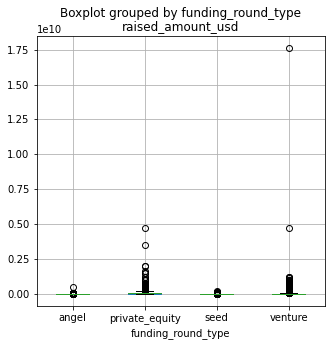

In [26]:
master_frame[(master_frame.funding_round_type.isin(['seed','angel','venture','private_equity']))].boxplot(column=["raised_amount_usd"], by="funding_round_type", figsize=(5,5))

#### By analysing this boxplot, we get to know that there are outliers present in our data.
#### As there are a lot of outliers present, mean will be effecting the value of our data, so we will be using median as it has lower effect when compared to mean.

In [27]:
master_frame[(master_frame.funding_round_type.isin(['seed','angel','venture','private_equity']))].groupby("funding_round_type")["raised_amount_usd"].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

### Checkpoint 2- Table 2.1 -
### Question 1:
#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

### Answer-
#### private_equity - 20000000.0
#### venture - 5000000.0
#### angel- 414906.0
#### seed - 300000.0


### Question 2:

#### Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

#### Answer- Based on the most representative investment amount calculated above, I think  the most suitable funding type for Spark Funds will be "Venture ", as the Spark Funds wants to invest between 5 to 15 million USD.

### Filtering the data based on our selected funding type

In [28]:
venture=master_frame[master_frame.funding_round_type=='venture']

In [29]:
venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


In [30]:
venture.shape

(47809, 10)

### Checkpoint 3 

In [31]:
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt


#### Question 1:- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)



In [32]:
top9=venture[venture.country_code.isin(venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[:9].index)]

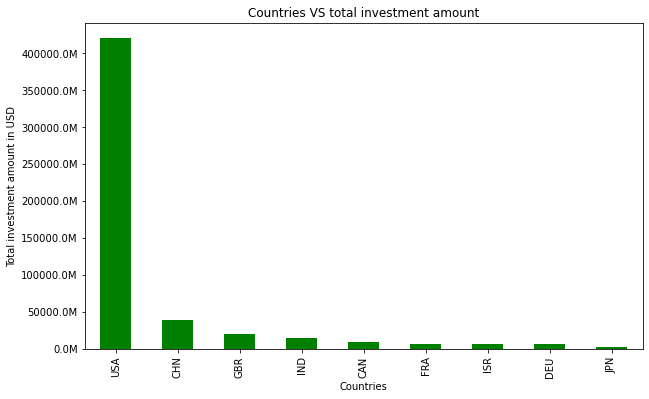

In [33]:
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

top9.groupby("country_code")["raised_amount_usd"].sum().sort_values(ascending = False).plot.bar(color="green", figsize=(10, 6)).get_yaxis().set_major_formatter(formatter)
plt.xlabel("Countries")
plt.ylabel("Total investment amount in USD")
plt.title("Countries VS total investment amount")
plt.show()

#### Answer:- These are the top 9 countries with highest total funding  -USA,CHN,GBR,IND,CAN,FRA,ISR,DEU,JPN 

#### Question 2:
#### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

### Answer:-
#### we have created a data frame named top9 

In [34]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA


###  Table 3.1
#### Question-
#### Identify the top three English-speaking countries in the data frame top9.
### Answer- 

#### According to wikipedia source - https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language
#### There are 4 english speaking countries(USA,GBR,IND,CAN), we need to select top 3 english speaking countries which are (USA,GBR,IND)
#### Top most english speaking country:- USA
#### Second most english speaking country:-     GBR
#### Third most english speaking country:- IND

### Checkpoint 4 - Sector Analysis

In [35]:
top3 = top9[top9.country_code.isin(["USA", "GBR", "IND"])].reset_index(drop=True)

In [36]:
top3.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
20609,/organization/medtel24-inc,/funding-round/0950f399a84ca65fdcc104fbce50f9f3,venture,24-09-2012,209804.0,/organization/medtel24-inc,MedTel24,Biotechnology,operating,USA
21997,/organization/my-health-direct,/funding-round/7b264592a1a9543949eee41334f737ca,venture,05-04-2011,4000000.0,/organization/my-health-direct,My Health Direct,Curated Web,operating,USA
24028,/organization/onforce,/funding-round/6f1cf5f1d829afbe34ca9165a6db7957,venture,03-11-2011,5000000.0,/organization/onforce,OnForce,Enterprise Software|Information Technology|Mar...,acquired,USA
28577,/organization/revolutionmoney,/funding-round/c7d09ec7cf09fede2d4ac40f54e456eb,venture,01-06-2009,15225000.0,/organization/revolutionmoney,Revolution Money,Finance,acquired,USA
38403,/organization/zentera-systems,/funding-round/7d9df5cc87269d98a5f5290978a12f60,venture,04-06-2015,4900000.0,/organization/zentera-systems,Zentera Systems,Cloud Computing|Service Providers|Technology,operating,USA
4571,/organization/biorelix,/funding-round/549ddd123b3f4b8f043cb5e8736f9a0a,venture,11-06-2007,25800000.0,/organization/biorelix,BioRelix,Biotechnology,operating,USA
7182,/organization/circle-1-network,/funding-round/fce23f61c40476d3863c890035929066,venture,10-10-2006,1300000.0,/organization/circle-1-network,Circle 1 Network,Education,operating,USA
16872,/organization/international-battery,/funding-round/6575efd384c914c88597e5f1190ea510,venture,06-05-2010,35000000.0,/organization/international-battery,International Battery,Clean Technology,closed,USA
22179,/organization/nabsys,/funding-round/785868596c25a32dec27c679829b0177,venture,13-03-2013,35049975.0,/organization/nabsys,Nabsys,Biotechnology,operating,USA
11319,/organization/enlink-geoenergy,/funding-round/b169ddf8cb731042f51266e8760d69a1,venture,14-02-2011,3000000.0,/organization/enlink-geoenergy,EnLink Geoenergy Services,Clean Technology,operating,USA


#### Question-1
#### Extract the primary sector of each category list from the category_list column

#### Answer:-

In [37]:
top3['primary_sector']=top3.category_list.apply(lambda x:x.split("|")[0].strip().lower())

In [38]:
top3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps
...,...,...,...,...,...,...,...,...,...,...,...
38798,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,biotechnology
38799,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,biotechnology
38800,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,biotechnology
38801,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,e-commerce


#### we have extracted primary sector of each category_list from the category_list column

In [39]:
top3.primary_sector

0                media
1            analytics
2            analytics
3            analytics
4                 apps
             ...      
38798    biotechnology
38799    biotechnology
38800    biotechnology
38801       e-commerce
38802    biotechnology
Name: primary_sector, Length: 38803, dtype: object

#### using the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 

In [40]:
mapping=pd.read_csv("mapping.csv")

In [41]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [42]:
mapping=mapping[~mapping.category_list.isnull()].reset_index(drop=True)

#### replacing the "0" with "na" in category_list column in mapping dataframe

In [43]:
mapping.category_list = mapping.category_list.str.replace("0", "na")

In [44]:
mapping.sample(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
452,Mobile Health,0,0,0,0,1,0,0,0,0
313,Graphics,0,0,0,0,0,0,1,0,0
238,Energy IT,0,0,1,0,0,0,0,0,0
275,Financial Services,0,0,0,0,0,0,0,0,1
575,Robotics,0,0,0,0,0,0,0,1,0
578,Sales Automation,0,0,0,0,0,0,0,1,0
137,Consumer Behavior,0,0,0,0,0,0,0,0,1
624,Speech Recognition,0,0,0,0,1,0,0,0,0
175,Data Centers,0,0,0,0,0,0,0,0,1
565,Rental Housing,0,0,0,0,0,0,0,1,0


In [45]:
mapping.category_list = mapping.category_list.apply(lambda x: x.strip().lower())

In [46]:
mapping.Blanks.sum()

0

#### deleting Blanks column since it doesnt contain any info

In [47]:
mapping.drop(['Blanks'],axis=1,inplace=True)
mapping.reset_index(drop=True)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,3d,0,0,0,0,1,0,0,0
1,3d printing,0,0,0,0,1,0,0,0
2,3d technology,0,0,0,0,1,0,0,0
3,accounting,0,0,0,0,0,0,0,1
4,active lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
682,wholesale,0,0,0,0,0,0,1,0
683,wine and spirits,0,0,1,0,0,0,0,0
684,wireless,0,0,1,0,0,0,0,0
685,women,0,0,0,0,0,0,1,0


In [48]:
mapping.sample(20)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
261,families,0,0,0,0,0,0,1,0
609,social games,0,0,0,0,0,0,0,1
167,curated web,0,0,0,0,0,1,0,0
526,plumbers,0,0,0,0,0,0,1,0
582,semiconductor manufacturing equipment,0,1,0,0,0,0,0,0
51,baby boomers,0,0,0,1,0,0,0,0
53,banking,0,0,0,0,0,0,0,1
561,recycling,0,1,0,0,0,0,0,0
172,cyber security,0,0,0,0,0,0,0,1
385,ipad,0,0,0,0,0,0,1,0


#### using melt function to get the main_sector under each category_list in mapping file and going from wide to long format

In [49]:
mapping=pd.melt(mapping,id_vars=mapping.columns[0],value_vars=mapping.columns[1:])

In [50]:
mapping = mapping[mapping.value == 1].reset_index(drop=True)

In [51]:
mapping.sample(5)

,category_list,variable,value
447,oil & gas,Others,1
579,corporate training,"Social, Finance, Analytics, Advertising",1
666,risk management,"Social, Finance, Analytics, Advertising",1
289,cloud management,"News, Search and Messaging",1
389,home owners,Others,1


In [52]:
mapping.drop(columns=["value"], inplace=True)

#### dropping value column and modifying the column names

In [53]:
mapping.columns = ["primary_sector", "main_sector"]

In [54]:
mapping.sample(5)

,primary_sector,main_sector
226,veterinary,Health
574,consumer lending,"Social, Finance, Analytics, Advertising"
339,advice,Others
139,online video advertising,Entertainment
673,social crm,"Social, Finance, Analytics, Advertising"


#### mapping and merging primary sector with the main sector

In [55]:
top3 = top3.merge(mapping, on="primary_sector")

In [56]:
top3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
38783,/organization/yapta,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.0,/organization/yapta,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,Others
38784,/organization/yapta,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.0,/organization/yapta,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,Others
38785,/organization/yapta,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.0,/organization/yapta,Yapta,Tracking|Transportation|Travel,operating,USA,tracking,Others
38786,/organization/ziftit,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.0,/organization/ziftit,Ziftit,Gift Registries|Shopping,closed,USA,gift registries,Others


In [57]:
top3 = top3.reset_index(drop=True)

In [58]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment


### Checkpoint 5 

#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 

In [59]:
D1 = top3[(top3.country_code == "USA")  & top3.raised_amount_usd.between(5e6, 15e6)].reset_index(drop = True)
D2 = top3[(top3.country_code == "GBR")  & top3.raised_amount_usd.between(5e6, 15e6)].reset_index(drop = True)
D3 = top3[(top3.country_code == "IND")  & top3.raised_amount_usd.between(5e6, 15e6)].reset_index(drop = True)

#### 1. Total number of investments (count)



In [60]:
D1.shape

(12063, 12)

In [61]:
D2.shape

(621, 12)

In [62]:
D3.shape

(328, 12)

#### 2. Total amount of investment (USD)



In [63]:
D1.raised_amount_usd.sum()

107757097294.0

In [64]:
D2.raised_amount_usd.sum()

5379078691.0

In [65]:
D3.raised_amount_usd.sum()

2949543602.0

####  3. Top sector (based on count of investments)
#### 4. Second-best sector (based on count of investments)
####  5. Third-best sector (based on count of investments)
####  6. Number of investments in the top sector (refer to point 3)
#### 7. Number of investments in the second-best sector (refer to point 4)
#### 8. Number of investments in the third-best sector (refer to point 5)




In [66]:
D1.groupby("main_sector")["raised_amount_usd"].count().sort_values(ascending=False)[:3]

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: raised_amount_usd, dtype: int64

In [67]:
D2.groupby("main_sector")["raised_amount_usd"].count().sort_values(ascending= False)[:3]

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: raised_amount_usd, dtype: int64

In [68]:
D3.groupby("main_sector")["raised_amount_usd"].count().sort_values(ascending= False)[:3]

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: raised_amount_usd, dtype: int64

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [69]:
D1[D1.main_sector == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [70]:
D2[D2.main_sector == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [71]:
D3[D3.main_sector == "Others"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [72]:
D1[D1.main_sector == "Social, Finance, Analytics, Advertising"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64

In [73]:
D2[D2.main_sector == "Social, Finance, Analytics, Advertising"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [74]:
D3[D3.main_sector == "Social, Finance, Analytics, Advertising"].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)[:1]

name
Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64

### Checkpoint 6

### importing libraries for visualizations

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

###  Plot :1 
#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   



In [76]:
plot_table=master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]

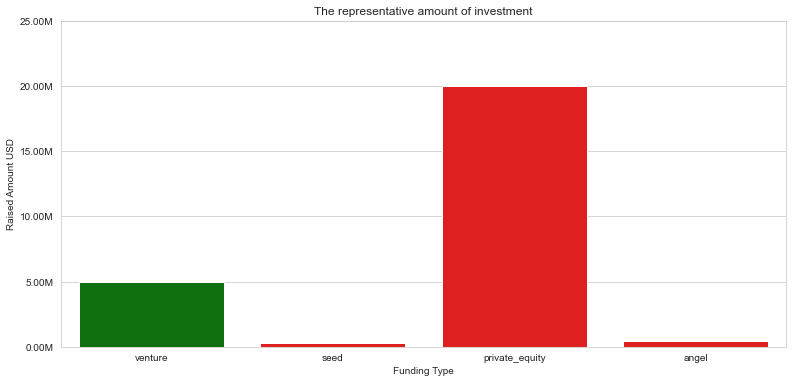

In [77]:
plt.figure(figsize=[13,6])
sns.set_style("whitegrid")
chart=sns.barplot(plot_table['funding_round_type'],plot_table['raised_amount_usd'], estimator= np.median, ci=None, palette=["green", "red", "red", "red"])
chart.set(xlabel="Funding Type",ylabel="Raised Amount USD",title='The representative amount of investment')
chart.set(ylim = (0,25e6))
ylabels = ['{:,.2f}'.format(x) + 'M' for x in chart.get_yticks()/1e6]
chart.set_yticklabels(ylabels)
plt.show()

### Plot 2:
#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             



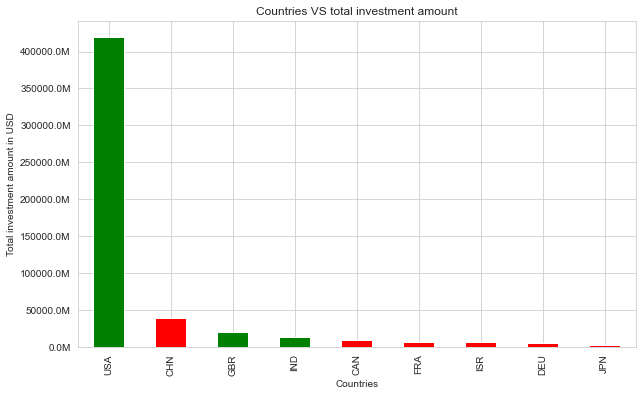

In [78]:
top9.groupby("country_code")["raised_amount_usd"].sum().sort_values(ascending = False).plot.bar(color=["green", "red", "green", "green", "red", "red", "red", "red", "red"], figsize=(10, 6)).get_yaxis().set_major_formatter(formatter)
plt.xlabel("Countries")
plt.ylabel("Total investment amount in USD")
plt.title("Countries VS total investment amount")
plt.show()

### Plot 3:
#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.



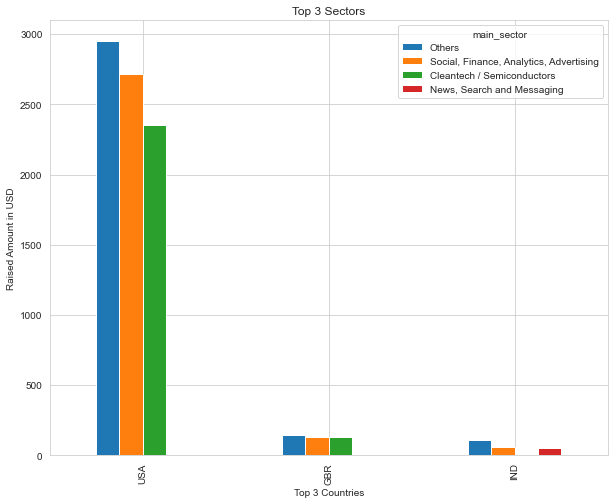

In [79]:
country1_usa_top3_count = (
    D1[["raised_amount_usd", "main_sector"]]
    .groupby(["main_sector"], sort=False)
    .agg({"raised_amount_usd": "count"})
    .reset_index()
)
country1_usa_top3_count.sort_values(["raised_amount_usd"], axis=0, ascending=False, inplace=True)
country1_usa_top3_count = country1_usa_top3_count.head(3)

country2_gbr_top3_count = (
    D2[["raised_amount_usd", "main_sector"]]
    .groupby(["main_sector"], sort=False)
    .agg({"raised_amount_usd": "count"})
    .reset_index()
)
country2_gbr_top3_count.sort_values(["raised_amount_usd"], axis=0, ascending=False, inplace=True)
country2_gbr_top3_count = country2_gbr_top3_count.head(3)

country3_ind_top3_count = (
    D3[["raised_amount_usd", "main_sector"]]
    .groupby(["main_sector"], sort=False)
    .agg({"raised_amount_usd": "count"})
    .reset_index()
)
country3_ind_top3_count.sort_values(["raised_amount_usd"], axis=0, ascending=False, inplace=True)
country3_ind_top3_count = country3_ind_top3_count.head(3)

country1_usa_country2_gbr_count = pd.merge(country1_usa_top3_count, country2_gbr_top3_count, how="outer", on="main_sector")
country1_usa_country2_gbr_country3_ind_count = pd.merge(country1_usa_country2_gbr_count, country3_ind_top3_count, how="outer", on="main_sector")

country1_usa_country2_gbr_country3_ind_count = country1_usa_country2_gbr_country3_ind_count.rename(
    columns={
        "raised_amount_usd_x": "USA",
        "raised_amount_usd_y": "GBR",
        "raised_amount_usd": "IND",
    }
)
country1_usa_country2_gbr_country3_ind_count = country1_usa_country2_gbr_country3_ind_count.set_index("main_sector")
country1_usa_country2_gbr_country3_ind_count = country1_usa_country2_gbr_country3_ind_count.fillna(0)

country1_usa_country2_gbr_country3_ind_count
country1_usa_country2_gbr_country3_ind_count.T.plot.bar(figsize=[10,8],title='Top 3 Sectors',fontsize=10)
plt.xlabel('Top 3 Countries')
plt.ylabel('Raised Amount in USD')
plt.show()